In [ ]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
print(load_iris()['DESCR'])

## 3. (a)

Classa reassignment in the below cell to Virginica and Non Virginica

In [3]:
dataset = load_iris()['data']
target = load_iris()['target']
target[:100] = -1
target[100:] = 1
df = pd.DataFrame(dataset)
df = df.rename( columns={0: "SL", 1: "SW", 2:"PL",3:"PW"})
df = df.assign(IsVirginica=pd.Series(target))
weight = np.ones(len(dataset))/len(dataset)

Initial Visualisation of the dataset

Text(0.5, 1.0, 'Distribution Plot (Virginica=1)')

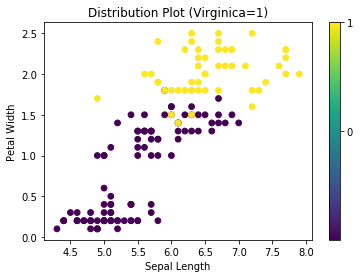

In [4]:
plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = weight*5000)
plt.colorbar(ticks = [0,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Distribution Plot (Virginica=1)')

In [12]:
import time

In [32]:
def adaboost(df, wt):
    weights = np.copy(wt)
    print(sum(weights))
    alpha_m_ = []
    final = []
    for i in range(10):
        dt = tree.DecisionTreeClassifier(max_depth=1)
        dt.fit(df[['SL','PW']],df["IsVirginica"],sample_weight=weights)
        predicted = dt.predict(df[['SL','PW']])
        ground_truth = df['IsVirginica']
        error = sum(weights[(np.nonzero(predicted - ground_truth)[0])])/sum(weights)
        alpha_m = 0.5*np.log((1-error)/error)
        alpha_m_.append(alpha_m)
        weights[np.nonzero(predicted - ground_truth)[0]]*=np.exp(alpha_m)
        weights[np.delete(np.arange(150),(np.nonzero(predicted - ground_truth)[0]))]*=np.exp(-alpha_m)
        weights = weights/sum(weights)
        final.append(predicted)
        plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = weights*5000)
        plt.colorbar(ticks = [0,1])
        plt.xlabel('Sepal Length')
        plt.ylabel('Petal Width')
        plt.title('Distribution Plot (Virginica=1)')
        plt.show()
        print(accuracy_score(ground_truth,predicted))
        time.sleep(2)
    return alpha_m_, final

1.0000000000000024


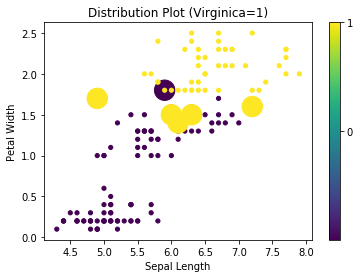

0.96


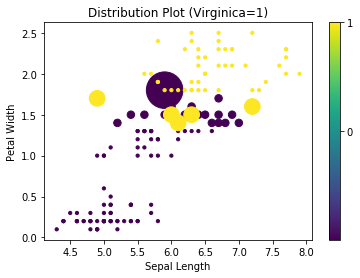

0.8533333333333334


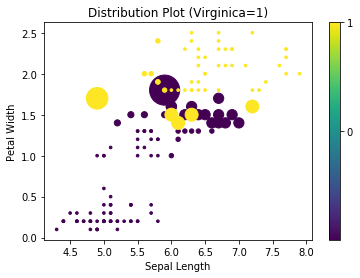

0.7933333333333333


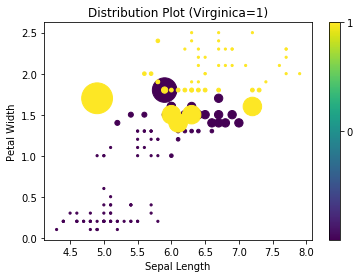

0.8933333333333333


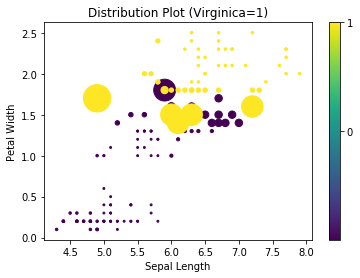

0.5333333333333333


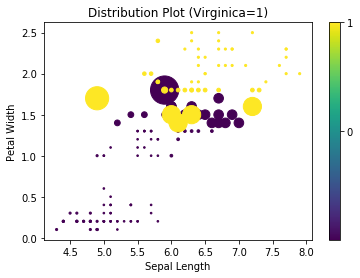

0.8533333333333334


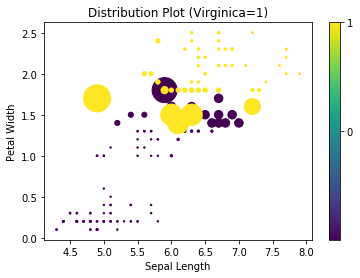

0.7466666666666667


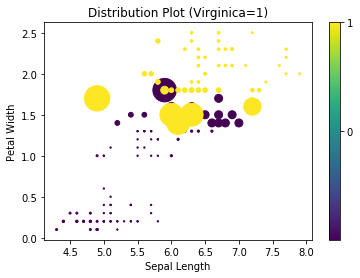

0.5333333333333333


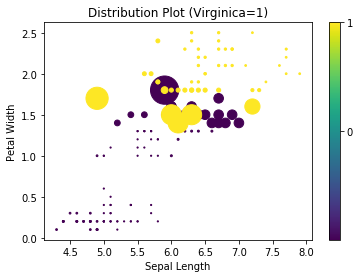

0.8533333333333334


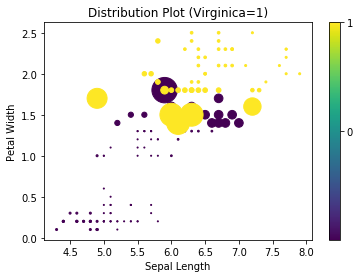

0.5333333333333333


In [33]:
a,b = adaboost(df,weight)

In [34]:
new_arr = np.zeros(150)
for i in range(len(b)):
    new_arr+=b[i]*a[i]

In [35]:
np.sign(new_arr)
gt = df['IsVirginica']
accuracy_score(gt, np.sign(new_arr))

0.96